# LIMPIEZA Y EDA
## Limpieza

In [283]:
library(readr)
library(dplyr)
library(ggplot2)
library(pracma)

In [284]:
install.packages("tidyverse")
install.packages("pracma")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [285]:
#obtenemos datos 
data<-read.csv("casos_nacionales_covid-19.csv")

In [286]:
head(data)

,X,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,⋯,otro_caso,toma_muestra_lab,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante,pais_nacionalidad,pais_origen,uci
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2021-,z482b8,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,NA,NA,⋯,NO,NO,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
2,2,2021-,z24953,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,⋯,SI,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
3,3,2021-,zz8e77,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,NA,NA,⋯,NO,NO,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
4,4,2021-,z2d0c4,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,⋯,NO,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
5,5,2021-,z26b82,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,⋯,NO,NO,NO APLICA (CASO SIN MUESTRA),SI,NEGATIVO A SARS-COV-2,NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
6,6,2021-,z1b985,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,⋯,SI,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA


### Missing values

In [289]:
missing_data <-sapply(data, function(x) sum(length(which(is.na(x)))))

In [290]:
options(scipen=999)#quito notación científica
missing_data<-data.frame(missing_data) 
missing_data<-add_rownames(missing_data, var = "variable")

#imprimo solo las variables con nas en porcentaje
missing_data %>% 
filter(missing_data>0)%>%
mutate(missing_data= missing_data/nrow(data))

variable,missing_data
<chr>,<dbl>
sector,0.00001210931
entidad_res,0.85432897914
municipio_res,0.85432931551
fecha_def,0.97958504069
pais_origen,0.00105721046


Lo primero que notamos es que las variables entidad_res y municipio_res cuentan con una alta proporción de valroes faltantes. De igual manera, la fecha de defunción que probablemente será menos problemática pues podenmos hacer un supuesto bastante creible de que solo tienen valor aquellas personas que han perecido. En cuanto a sector y país de origne, los missing values realmente son muy pocos y podemos prescindir de dichas observaciones.

## Clases

In [291]:
summary(data)

       X           fecha_actualizacion id_registro           origen         
 Min.   :      1   Length:2972918      Length:2972918     Length:2972918    
 1st Qu.: 743230   Class :character    Class :character   Class :character  
 Median :1486460   Mode  :character    Mode  :character   Mode  :character  
 Mean   :1486460                                                            
 3rd Qu.:2229689                                                            
 Max.   :2972918                                                            
    sector           entidad_um            sexo           entidad_nac       
 Length:2972918     Length:2972918     Length:2972918     Length:2972918    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [292]:
#notamos que la gran mayoría de las variables son categóricas.
#esto es malo especificamente para las fechas
class(data$fecha_def)
class(data$fecha_sintomas)
class(data$fecha_ingreso)


[1] "character"

[1] "character"

[1] "character"

In [293]:
head(data$fecha_def,10)
head(data$fecha_sintomas,10)
head(data$fecha_ingreso,10)

[1] NA NA NA NA NA NA NA NA NA NA

[1] "2020-10-16" "2020-10-15" "2020-04-10" "2020-10-14" "2021-01-10"
 [6] "2020-04-21" "2020-10-01" "2020-05-16" "2020-09-03" "2020-10-06"

[1] "2020-10-16" "2020-10-15" "2020-04-16" "2020-10-15" "2021-01-14"
 [6] "2020-04-26" "2020-10-10" "2020-05-16" "2020-09-08" "2020-10-07"

In [294]:
#notamos que el formato de las fechas es AAAA/MM/DD
data$fecha_def <- as.Date(data$fecha_def)
data$fecha_sintomas <- as.Date(data$fecha_sintomas)
data$fecha_ingreso <- as.Date(data$fecha_ingreso)

## Conclusiones

+ No podemos aprovechar de la mejor manera los datos referentes a la localización geográfica pues son muchísimos missing values y una estrategia de imputación correcta va más allá de los objetivos y alcances del curso.

+ Las variables con categóricas y las observaciones son a nivel individuo.

+ Convertimos las variables de fecha al formato correcto



## EDA

In [295]:
#Podemos hacer una estiamcion y calculo de integral con las fechas

sintomas<-data%>% 
group_by(fecha_sintomas)%>% 
summarise(cantidad=n())%>%
  mutate(cum = cumsum(cantidad))

ingreso<-data%>% 
group_by(fecha_ingreso)%>% 
summarise(cantidad=n())%>%
  mutate(cum = cumsum(cantidad))

muerte<-data%>% 
group_by(fecha_def)%>% 
summarise(cantidad=n())%>%
  mutate(cum = cumsum(cantidad))


Warning message:
“Removed 1 rows containing missing values (position_stack).”


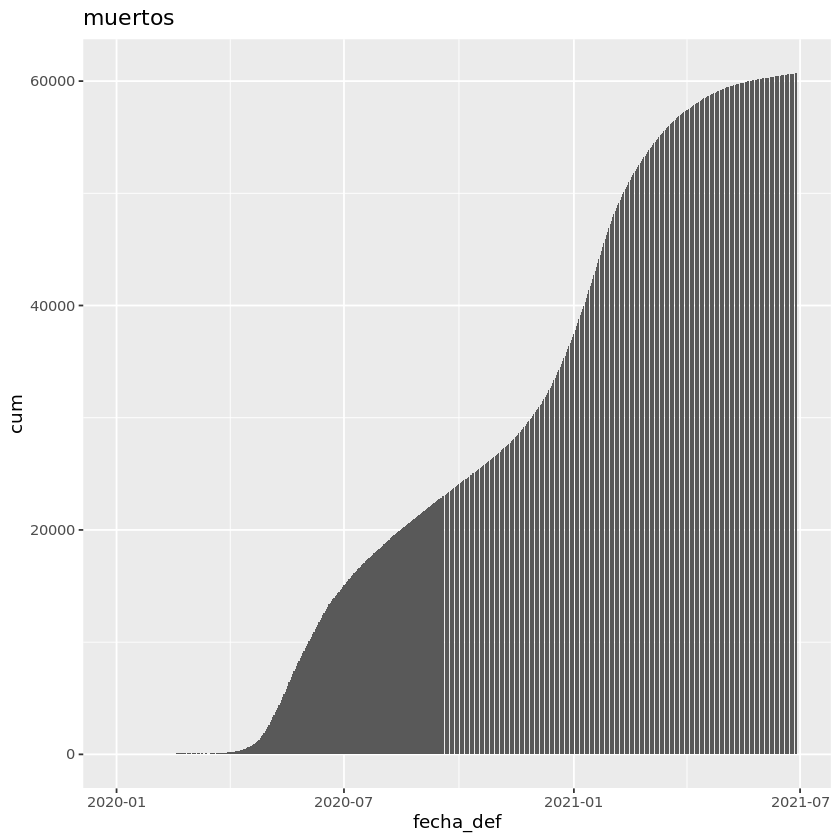

In [296]:
library(ggplot2)
ggplot(data=muerte, aes(x=fecha_def, y=cum)) +
  geom_bar(stat="identity")+ggtitle("muertos")

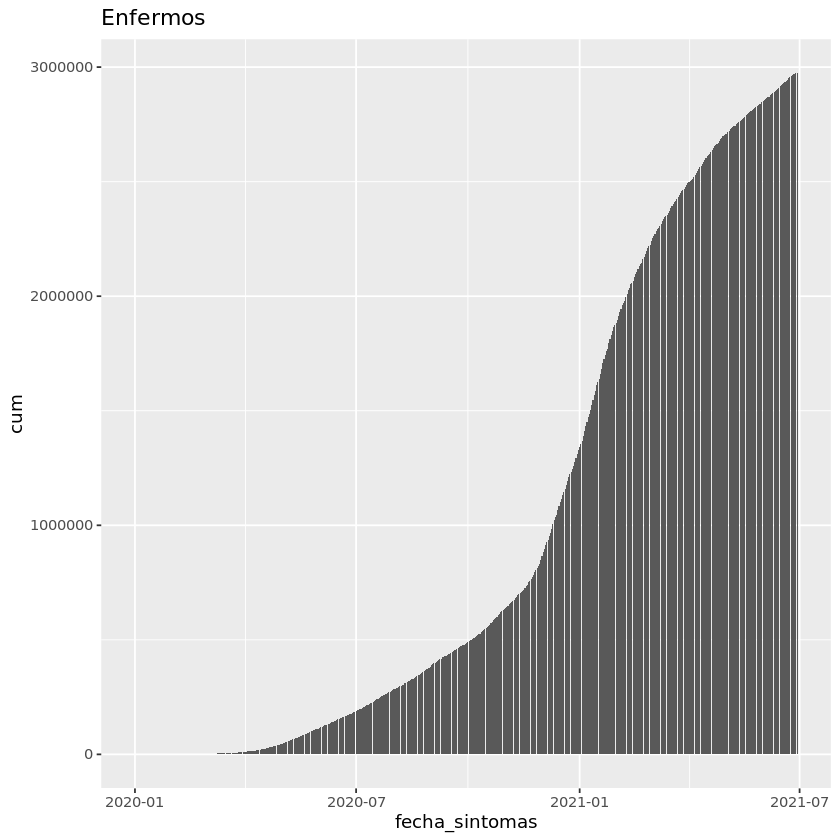

In [297]:
ggplot(data=sintomas, aes(x=fecha_sintomas, y=cum)) +
  geom_bar(stat="identity")+ggtitle("Enfermos")

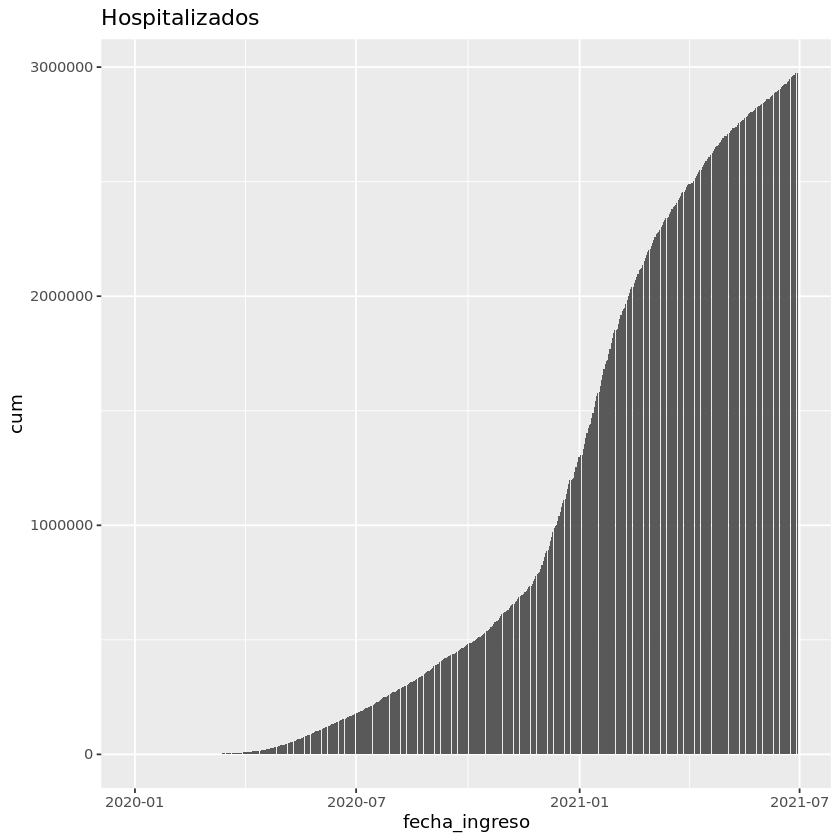

In [298]:
ggplot(data=ingreso, aes(x=fecha_ingreso, y=cum)) +
  geom_bar(stat="identity")+ggtitle("Hospitalizados")

## Feature Engieneering


Creamos las variables relacionadas con el tiempo entre presentar sintomas, ser hospitalizado y perecer.

In [299]:
##time to hospital
data<-data %>% mutate(tiempo_enf_to_hosp=fecha_ingreso-fecha_sintomas)
data$tiempo_enf_to_hosp<-as.numeric(data$tiempo_enf_to_hosp)

##time to hospital and death
data<-data %>% mutate(tiempo_to_death=fecha_def-fecha_ingreso)
data$tiempo_to_death<-as.numeric(data$tiempo_to_death)


##time from infection to death
data<-data %>% mutate(tiempo_inf_death=fecha_def-fecha_sintomas)
data$tiempo_inf_death<-as.numeric(data$tiempo_inf_death)

In [300]:
summary(data$tiempo_enf_to_hosp)
summary(data$tiempo_to_death)
summary(data$tiempo_inf_death)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    2.51    4.00  265.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -87.0     2.0     6.0     8.9    12.0   309.0 2912226 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -41.0     7.0    12.0    14.4    19.0   309.0 2912226 

<h1>ANÁLISIS DE DEFUNCIONES POR SEMANA</h1>

Análisis de número de defunciones por semana. 

In [302]:
year_def <-format(data$fecha_def, format="%Y") #Obtenemos los años de las fechas

In [303]:
week_def <-format(data$fecha_def, format="%V") #Obtenemos las semanas de las fechas


In [304]:
defun<-data.frame(year_def,week_def, def=data$fecha_def) #creamos un data frame con los años y fechas de las defunciones

In [305]:
df2<-subset(defun, year_def!="NA")# eliminamos los datos en los cuales no hubo defunciones (NA)

In [306]:
df2["def"] <- 1 #Agregamos una columna de 1's para hacer la suma de defunciones por semana

In [307]:
head(df2)

,year_def,week_def,def
,<chr>,<chr>,<dbl>
20,2020,20,1
221,2020,15,1
226,2020,15,1
228,2020,15,1
230,2020,15,1
234,2020,15,1


In [308]:
tibble_df2 <- as_tibble(df2)

In [309]:
select(df2, year_def, week_def, def) #seleccionamos algunas columnas de importancia

,year_def,week_def,def
,<chr>,<chr>,<dbl>
20,2020,20,1
221,2020,15,1
226,2020,15,1
228,2020,15,1
230,2020,15,1
234,2020,15,1
330,2020,18,1
415,2020,16,1
438,2020,15,1


In [310]:
df3<-df2 %>%
  group_by(year_def, week_def) %>%
  summarize(sum_def = sum(def, na.rm = TRUE))

#df3 contiene la suma de defunciones por semana

`summarise()` has grouped output by 'year_def'. You can override using the `.groups` argument.



In [311]:
df4<-subset(df3,  week_def!="53") #eliminamos datos que no son lógicos, como semana 53 del año 2021

In [312]:
df5<-df4[1:(76),] #eliminamos última semana para después hacer una estimación de la misma, el df5 será el que utilizaremos

In [313]:
sem<-df5$week_def
muertes<-df5$sum_def
semana<-as.double(sem)
anio<-df5$year_def

df6<-data.frame(anio,semana,muertes) #A las semanas del año 2021, le agregamos 52 para diferenciarlas
a <- 1:24
for (i in seq_along(a)) {
  df6[52+i,2] <- df6[i,2]+52
}



<h2>Número máximo, mediana y promedio de muertes por semana:</h2>

In [314]:
summary(df6) #summary de muertes por semana

     anio               semana         muertes      
 Length:76          Min.   : 1.00   Min.   :   1.0  
 Class :character   1st Qu.:19.75   1st Qu.: 199.2  
 Mode  :character   Median :38.50   Median : 641.0  
                    Mean   :38.50   Mean   : 770.1  
                    3rd Qu.:57.25   3rd Qu.:1139.8  
                    Max.   :76.00   Max.   :2464.0  

<h2>Gráfico de disperción de muertes por semana, diferenciado por año</h2>

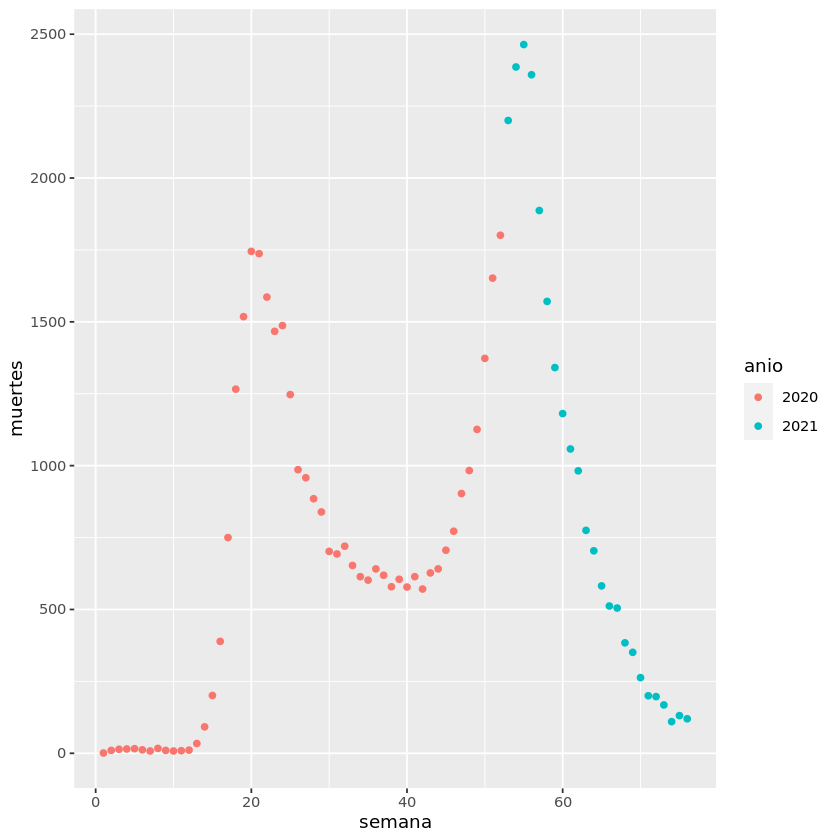

In [315]:
ggplot(df6) + geom_point(aes(x=semana,y=muertes, color=anio))



In [316]:
x1<-df6$semana
y1<-df6$muertes

p1<-polyfit(x1,y1,1) #polinomio grado 1
p2<-polyfit(x1,y1,2) #polinomio grado 2
p3<-polyfit(x1,y1,3) #polinomio grado 3
p6<-polyfit(x1,y1,6) #polinomio grado 6


<h2>Interpolación grado 1</h2>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



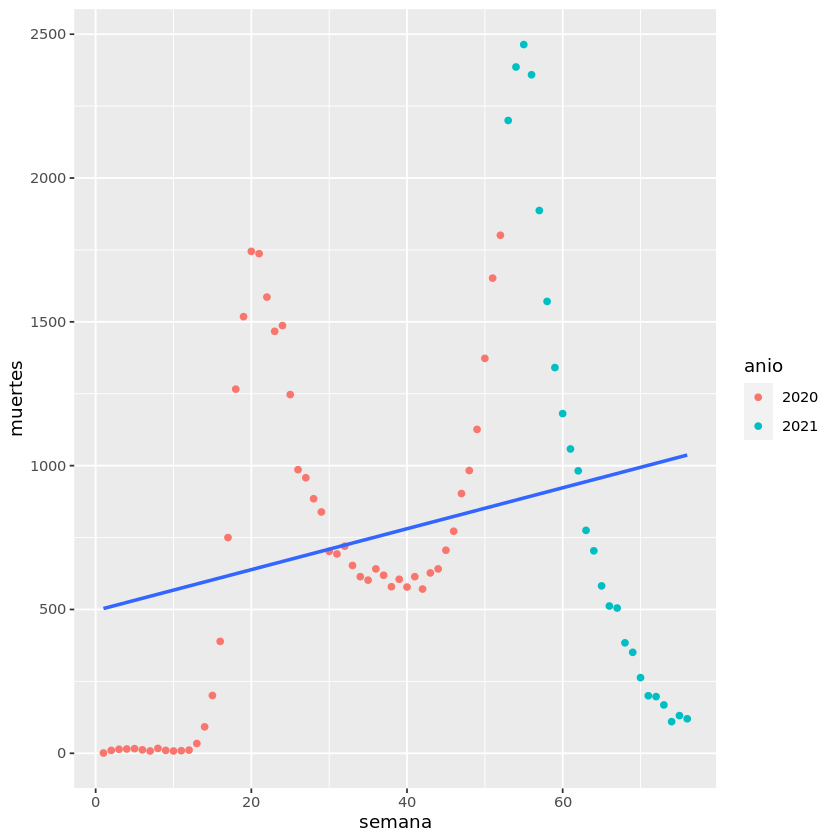

In [317]:
df6$approx1 <-polyval(p1,x1)

ggplot(df6) + geom_point(aes(x=semana,y=muertes, color=anio))+geom_smooth(aes(x=semana,y=approx1))

<h2>Interpolación grado 2</h2>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



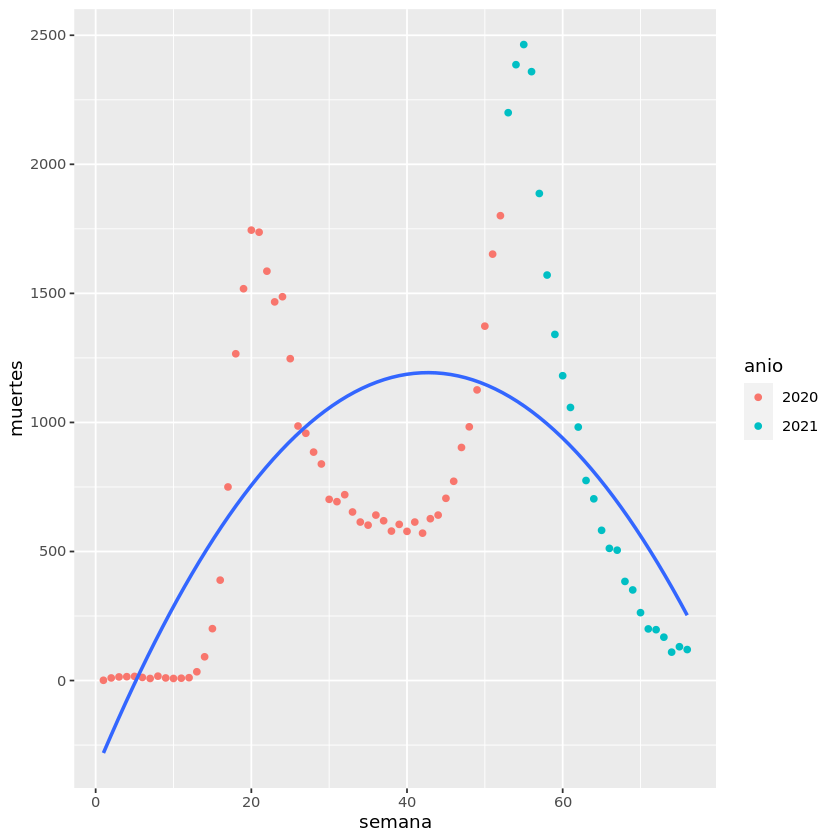

In [318]:
df6$approx2 <-polyval(p2,x1)
ggplot(df6) + geom_point(aes(x=semana,y=muertes, color=anio))+geom_smooth(aes(x=semana,y=approx2))

<h2>Interpolación grado 3</h2>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



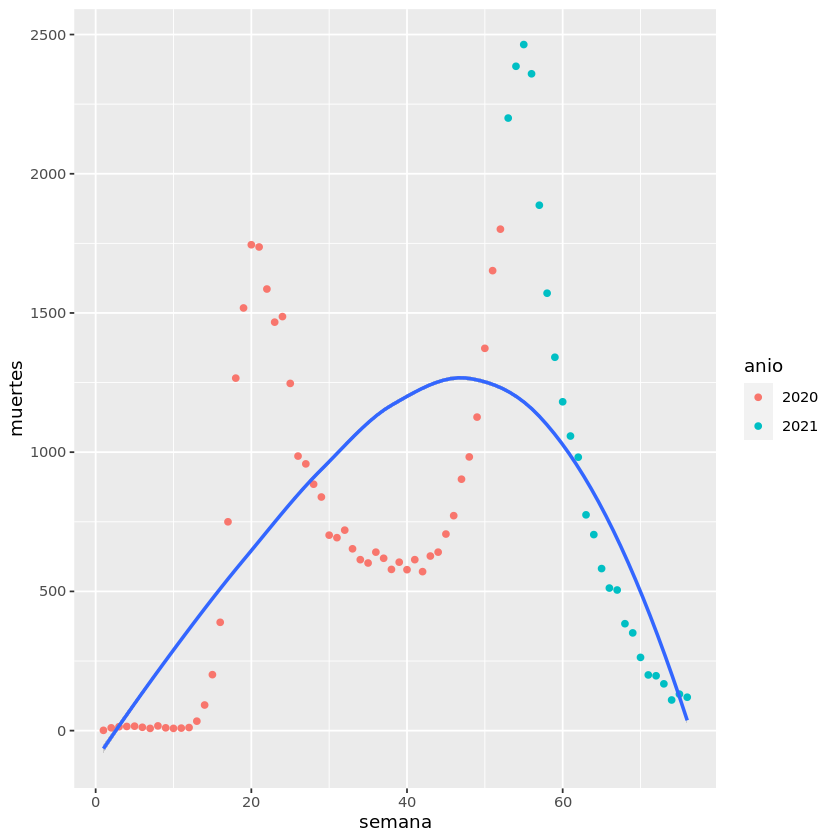

In [319]:
df6$approx3 <-polyval(p3,x1)
ggplot(df6) + geom_point(aes(x=semana,y=muertes, color=anio))+geom_smooth(aes(x=semana,y=approx3))

<h2>Interpolación grado 6</h2>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



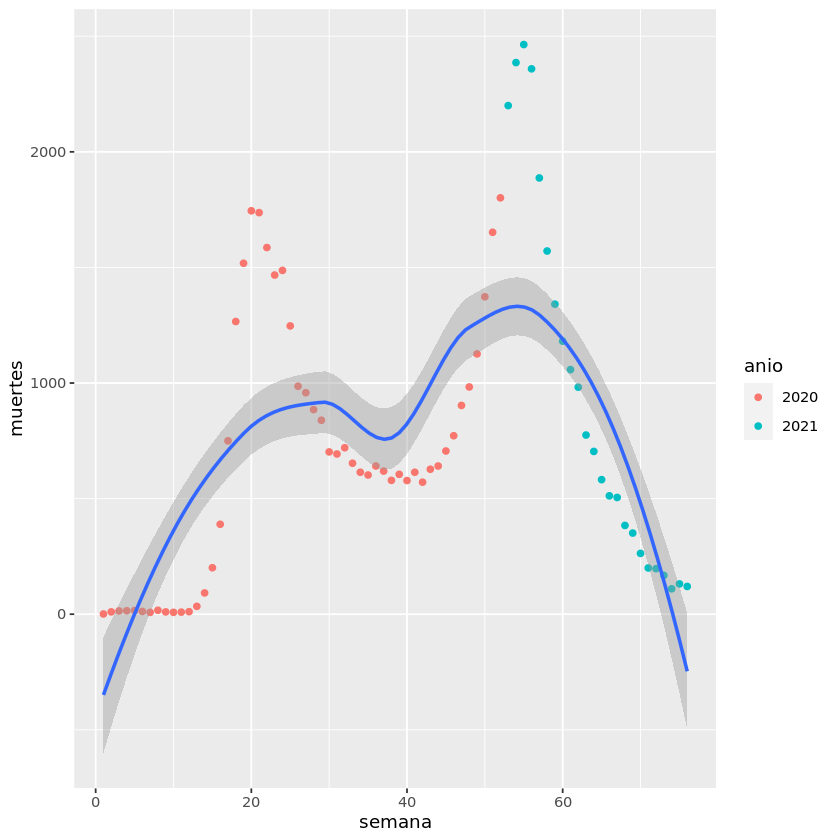

In [320]:
df6$approx6 <-polyval(p6,x1)
ggplot(df6) + geom_point(aes(x=semana,y=muertes, color=anio))+geom_smooth(aes(x=semana,y=approx6))

<h2>Interpolación con Spline 6</h2>

In [321]:
#SPLINE
f <- splinefun(x1, y1)
ls(envir = environment(f))
splinecoef <- get("z", envir = environment(f))


[1] "z"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



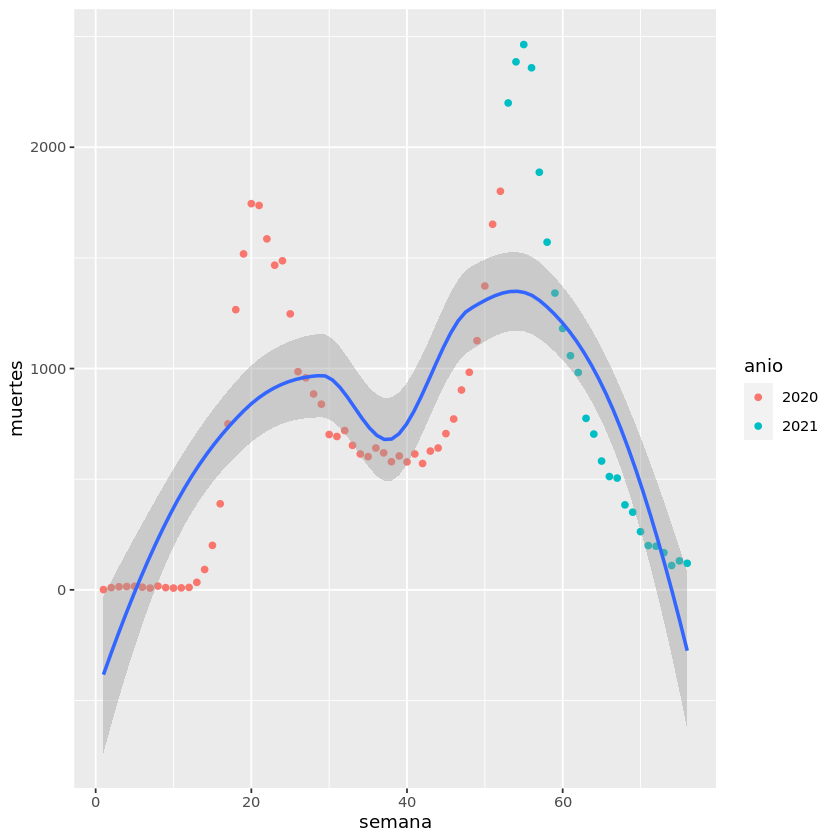

In [322]:
df6$approxspline <-f(x1)
ggplot(df6) + geom_point(aes(x=semana,y=muertes, color=anio))+geom_smooth(aes(x=semana,y=approxspline))


<h2> Estimación de muertes en semana 77 con polinomio g1,g2,g3,g6 y spline</h2>

Vamos a hacer una extrapolación del número de muertes en la semana 77. Es decir, queremos, con base en nuestros modelos, predecir el número de muertos en la semana 77. 

In [323]:
Est_p1<-polyval(p1,77)
Est_p2<-polyval(p2,77)
Est_p3<-polyval(p3,77)
Est_p6<-polyval(p6,77)
Est_spline<-f(77)

print(Est_p1)
print(Est_p2)
print(Est_p3)
print(Est_p6)
print(Est_spline)

[1] 1043.965
[1] 195.5798
[1] -113.0184
[1] 982.5259
[1] -47.65576


In [325]:
print(df4$sum_def[77])

[1] 118


La semana 77 tuvo 118 defunciones, por lo cual, el modelo que mejor extrapoló nuestra observación en este caso, fue el modelo del polinomio grado 2. 

**Definimos la función para el Error cuadrático medio de nuestras estimaciones:**

In [326]:
M_S_E <- function(est, obj) {
    sqsum=0
  for(i in 1:length(est)) {
    sqsum<-(obj[i]-est[i])**2+sqsum
    ecm<-sqsum/length(est)
  }
    print(ecm)
}


In [327]:
ECM_p1<-M_S_E(df6$approx1,df6$muertes)# ECM PARA POLINOMIO G1
ECM_p2<-M_S_E(df6$approx2,df6$muertes)# ECM PARA POLINOMIO G2
ECM_p3<-M_S_E(df6$approx3,df6$muertes)# ECM PARA POLINOMIO G3
ECM_p6<-M_S_E(df6$approx6,df6$muertes)# ECM PARA POLINOMIO G6
ECM_spline<-M_S_E(df6$approxspline,df6$muertes)# ECM PARA SPLINE

[1] 388691
[1] 255668.8
[1] 244051.9
[1] 97094.37
[1] 0


El error cuadrático medio lo podemos obtener con la función de min():

In [328]:
min(ECM_p1,ECM_p2,ECM_p3,ECM_p6,ECM_spline)

[1] 0

*Concluimos que la mejor estimación para nuestro modelo, es la del spline.*

<h2>Estimación de integral con polinomio grado 6</h2>

Necesitamos conocer el número de defunciones de la semana 1 a la 76.
Supongamos que no conocemos el número de defunciones por semana, por lo cual, debemos de estimarlo a partir de la función obtenida de la interpolación del polinomio grado 6.  

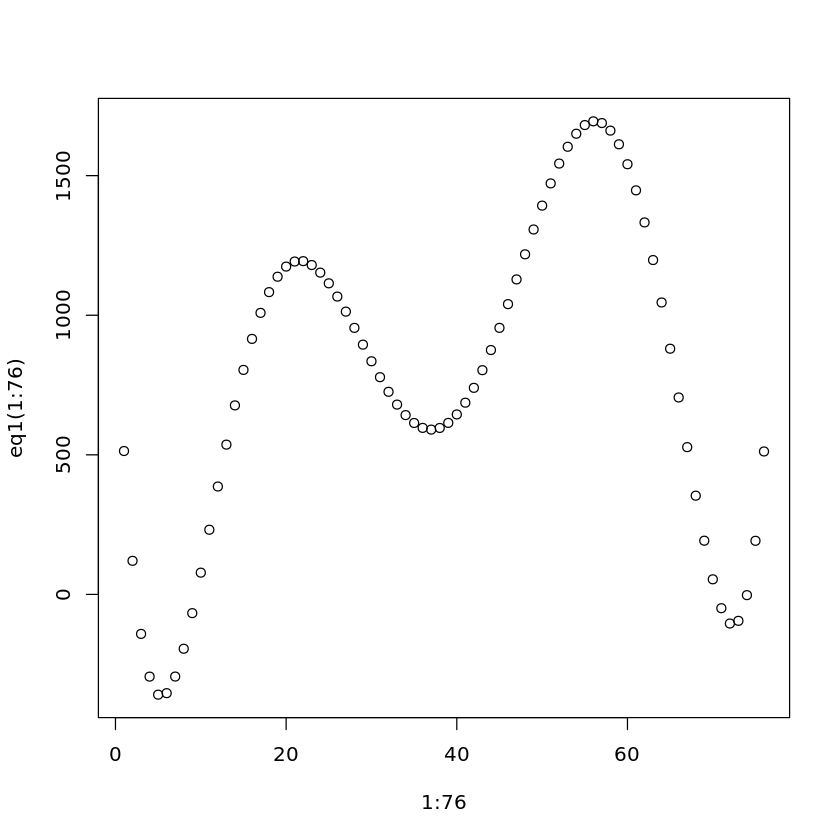

In [329]:
eq1 = function(x){(0.00000606019424051342*x^6)-(0.00140040473599997*x^5)+(0.121907555490365*x^4)-(4.94516796308746*x^3)+(92.5593257205104*x^2)-(638.201246371754*x)+(1064.09435543837)}
# la eq1 tiene los coeficientes del polinomio de grado 6 que se utilizaron para la interpolación.
plot(1:76,eq1(1:76))

In [330]:
n<-6
a<-1
b<-76
f<- function(x){(0.00000606019424051342*x^6)-(0.00140040473599997*x^5)+(0.121907555490365*x^4)-(4.94516796308746*x^3)+(92.5593257205104*x^2)-(638.201246371754*x)+(1064.09435543837)}
cc <- gaussLegendre(n,a,b)
Q <- sum(cc$w * f(cc$x))
Q

[1] 57939.74

In [331]:
integral<-integrate(f, a, b)
integral

57939.74 with absolute error < 0.00000000069

Si comparamos el valor de nuestra estimación de la integral, con el valor de la integral real, tenemos que el error relativo de nuestra estimación de la integral es:

In [332]:
error_reltivo_estimacion <- abs((Q-57939.74)/57939.74) *(100)
error_reltivo_estimacion

[1] 0.00000839447

El error de estimación es muy bajo, es del 0.0000084%

Por otro lado, si comparamos el valor de nuestra estimación, contra el valor real del total de suma de defunciones de nuestra base de datos, podemos obtener error relativo de nuestra aproximación, dado que 

In [333]:
num_def <-sum(df2$def) # Número total de defunciones

In [334]:
error_reltivo_totalDef <- abs((Q-num_def)/num_def) *(100)
error_reltivo_totalDef

[1] 4.534791

El error relativo de nuestra estimación de defunciones totales es del 4.5347%

<h2>Data Frame de variables nominales</h2>

In [335]:
df8<-select(data, sexo, tipo_paciente,intubado,fecha_def,neumonia,edad,diabetes,epoc,asma,inmusupr,hipertension,obesidad,renal_cronica,tabaquismo)

In [336]:
head(df8)

,sexo,tipo_paciente,intubado,fecha_def,neumonia,edad,diabetes,epoc,asma,inmusupr,hipertension,obesidad,renal_cronica,tabaquismo
,<chr>,<chr>,<chr>,<date>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,HOMBRE,AMBULATORIO,NO APLICA,NA,NO,41,NO,NO,NO,NO,NO,NO,NO,NO
2,MUJER,AMBULATORIO,NO APLICA,NA,NO,40,NO,NO,NO,NO,NO,NO,NO,NO
3,HOMBRE,AMBULATORIO,NO APLICA,NA,NO,34,NO,SI,SI,NO,NO,NO,NO,NO
4,MUJER,AMBULATORIO,NO APLICA,NA,NO,60,NO,NO,NO,NO,NO,SI,NO,NO
5,MUJER,AMBULATORIO,NO APLICA,NA,NO,20,NO,NO,NO,NO,NO,NO,NO,NO
6,MUJER,AMBULATORIO,NO APLICA,NA,NO,40,NO,NO,NO,NO,NO,NO,NO,NO


Dado que la base de datos, tiene una escala nominal, debemos transformar los datos de cada columna. 

In [337]:
#df8$sexo<-ifelse(df8$sexo=='MUJER',1,0) #Si es mujer tomará valor de 1, 0 en caso de ser hombre

In [356]:
df8$diabetes<-ifelse(df8$diabetes=='NO',0,1)
df8$epoc<-ifelse(df8$epoc=='NO',0,1)
df8$asma<-ifelse(df8$asma=='NO',0,1)
df8$inmusupr<-ifelse(df8$inmusupr=='NO',0,1)
df8$hipertension<-ifelse(df8$hipertension=='NO',0,1)
df8$obesidad<-ifelse(df8$obesidad=='NO',0,1)
df8$renal_cronica<-ifelse(df8$renal_cronica=='NO',0,1)
df8$tabaquismo<-ifelse(df8$tabaquismo=='NO',0,1)


In [357]:
head(df8)

,sexo,tipo_paciente,intubado,fecha_def,neumonia,edad,diabetes,epoc,asma,inmusupr,hipertension,obesidad,renal_cronica,tabaquismo
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HOMBRE,AMBULATORIO,NO APLICA,NA,NO,41,1,1,1,1,1,1,1,1
2,MUJER,AMBULATORIO,NO APLICA,NA,NO,40,1,1,1,1,1,1,1,1
3,HOMBRE,AMBULATORIO,NO APLICA,NA,NO,34,1,1,1,1,1,1,1,1
4,MUJER,AMBULATORIO,NO APLICA,NA,NO,60,1,1,1,1,1,1,1,1
5,MUJER,AMBULATORIO,NO APLICA,NA,NO,20,1,1,1,1,1,1,1,1
6,MUJER,AMBULATORIO,NO APLICA,NA,NO,40,1,1,1,1,1,1,1,1


In [361]:
df8$fecha_def<-format(df8$fecha_def, format="%V")
df8["def"] <- 1
df9<-subset(df8, fecha_def!="NA")


In [362]:
df10<-df9%>%
  group_by(sexo, edad) %>%
  summarise(sum_def = sum(def, na.rm = TRUE))

summary(df10)

`summarise()` has grouped output by 'sexo'. You can override using the `.groups` argument.



     sexo                edad           sum_def       
 Length:210         Min.   :  0.00   Min.   :   1.00  
 Class :character   1st Qu.: 26.00   1st Qu.:  20.25  
 Mode  :character   Median : 52.00   Median : 144.50  
                    Mean   : 52.11   Mean   : 289.01  
                    3rd Qu.: 78.00   3rd Qu.: 527.25  
                    Max.   :119.00   Max.   :1139.00  

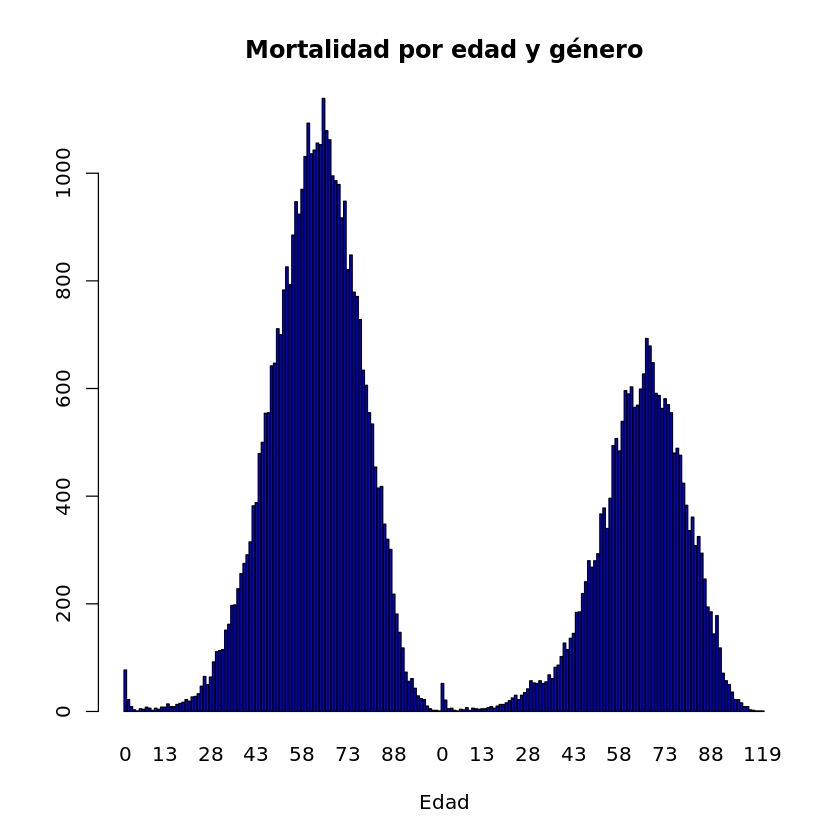

In [363]:
barplot(height=df10$sum_def, names=df10$edad,
main = "Mortalidad por edad y género",
xlab = "Edad",
col = c("blue")
)

<h1> Marco!! No sé si me pudieras ayudar por favor con la gráfica de arriba para diferenciar en color al barplot de la derecha y el de la izquierda. Los 1s son mujeres y los 0s son hombres</h1>

<h2> Contingency Analysis </h2>

Existe la hipótesis que una persona es intubada si presenta cierto tipo de condiciones: asma, diabetes, epoc, etc. Para un nivel de significancia de .05, vamos a rechazar o aceptar la hipótesis de independencia de estas variables

In [340]:
df10<-subset(df8, intubado!='NO APLICA')
df11<-subset(df10, intubado!='NO ESPECIFICADO')


In [341]:
#df11$intubado<-ifelse(df11$intubado=='NO',0,1)

In [342]:
df_intubado <-select(df11,sexo,intubado,diabetes, epoc, asma, inmusupr, hipertension, obesidad, renal_cronica, tabaquismo)

In [343]:
head(df_intubado)

,sexo,intubado,diabetes,epoc,asma,inmusupr,hipertension,obesidad,renal_cronica,tabaquismo
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,HOMBRE,SI,0,0,0,0,0,0,0,1
27,HOMBRE,NO,1,0,0,0,0,0,0,0
32,HOMBRE,NO,0,0,0,0,0,0,0,0
53,MUJER,NO,0,0,0,1,1,0,1,0
61,MUJER,NO,0,0,0,0,0,0,0,0
97,HOMBRE,NO,0,0,0,0,0,0,0,0


In [344]:
df_chi<-df_intubado%>%
  group_by(intubado) %>%
  summarise(sum_diab = sum(diabetes, na.rm = TRUE),sum_EPOC = sum(epoc, na.rm = TRUE),sum_asma = sum(asma, na.rm = TRUE),sum_inmusupr = sum(inmusupr, na.rm = TRUE),sum_hipertension = sum(hipertension, na.rm = TRUE),sum_obesidad = sum(obesidad, na.rm = TRUE),sum_renal_cronica = sum(renal_cronica, na.rm = TRUE),tabaquismo = sum(tabaquismo, na.rm = TRUE) )


In [345]:
df_chi

intubado,sum_diab,sum_EPOC,sum_asma,sum_inmusupr,sum_hipertension,sum_obesidad,sum_renal_cronica,tabaquismo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NO,34596,4946,3146,5778,40376,23436,7618,12620
SI,7613,1016,514,942,8593,5613,1439,2735


In [346]:
observed_table <- matrix(c(34596,4946,3146,5778,40376,23436,7618,12620,7613,1016,514,942,8593,5613,1439,2735), nrow = 2, ncol = 8, byrow = T)
rownames(observed_table) <- c('NO INTUBADO', 'INTUBADO')
colnames(observed_table) <- c('Diabetes', 'EPOC', 'Asma','Inmunosuprimido','Hipertension','Obesidad','Renal cronico', 'Tabaquismo')
observed_table

,Diabetes,EPOC,Asma,Inmunosuprimido,Hipertension,Obesidad,Renal cronico,Tabaquismo
NO INTUBADO,34596,4946,3146,5778,40376,23436,7618,12620
INTUBADO,7613,1016,514,942,8593,5613,1439,2735


$$H_0: \text{las dos variables son independientes(estar intubado y estado de salud)}$$
$$H_1: \text{las dos variables no son independientes}$$

In [347]:
chi_test <- chisq.test(observed_table)

In [348]:
chi_test


	Pearson's Chi-squared test

data:  observed_table
X-squared = 175.11, df = 7, p-value < 0.00000000000000022


El valor p es menor que el nivel de significancia (0.05). Por tanto, podemos rechazar la hipótesis nula y concluir que las dos variables (estar intubado y condición médica) no son independientes.

<h3>Fuentes:</h3>

[Contingency analysis in r](https://www.datacamp.com/community/tutorials/contingency-analysis-r)  
[How to extract year from date in r](
https://www.marsja.se/how-to-extract-year-from-date-in-r-with-examples/#How_do_I_get_the_year_from_a_date_in_R)  
[Delete or drop rows in r](https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/)  
[How to add new columns in r](https://stackoverflow.com/questions/19508256/how-to-add-new-column-to-an-dataframe-to-the-front-not-end)  
[Aggregating and analyzing data with dplyr](https://datacarpentry.org/R-genomics/04-dplyr.html)  
[Integrate function](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/integrate)
[From String to double](https://stackoverflow.com/questions/26734913/r-converting-from-string-to-double)  
[polyfit, polyval en R](https://www.youtube.com/watch?v=ZQJO8mlhj7A)  
[Gauss Legendre](https://www.rdocumentation.org/packages/pracma/versions/1.9.9/topics/gaussLegendre)  
[Spline Function](https://astrostatistics.psu.edu/su07/R/html/stats/html/splinefun.html)  
[How to change the code ues to 1 in r](https://www.tutorialspoint.com/how-to-change-the-code-yes-to-1-in-an-r-data-frame-column)  
[Replace NA values with zeros](https://stackoverflow.com/questions/8161836/how-do-i-replace-na-values-with-zeros-in-an-r-dataframe)